In [6]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [7]:
class BmiState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: float

In [8]:
def calculate_bmi(state: BmiState):
    weight_kg = state['weight_kg']
    height_m = state['height_m']

    bmi = weight_kg/(height_m**2)

    state['bmi'] = bmi

    return state

In [22]:
def label_category(state: BmiState):

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Under Weight"
    elif bmi <25:
        state["category"] = "Normal"
    elif bmi< 30:
        state["category"] = "Over weight"
    else:
        state["category"] = "Obese"
    
    return state

In [23]:
# Define your Graph
graph = StateGraph(BmiState)

# Define your Nodes
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_category", label_category)

# Define your Edges
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi", "label_category")
graph.add_edge("label_category",END)

workflow = graph.compile()




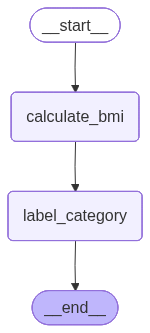

In [24]:
workflow

In [25]:
# Execute the Graph

intial_state = {"weight_kg": 65, "height_m": 1.73}

final_state = workflow.invoke(input=intial_state)



In [26]:
print(final_state)

{'weight_kg': 65, 'height_m': 1.73, 'bmi': 21.71806608974573, 'category': 'Normal'}
